In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
os.getcwd()

'c:\\Users\\prach\\OneDrive\\Desktop\\DataScience'

In [3]:
import os

In [4]:
df = pd.read_csv('spam.csv')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3068,ham,Ay wana meet on sat?Ì_ wkg on sat?,NaN,NaN,NaN
4627,spam,Todays Voda numbers ending with 7634 are selec...,NaN,NaN,NaN
1899,ham,I love working from home :),NaN,NaN,NaN
1939,spam,More people are dogging in your area now. Call...,NaN,NaN,NaN
4761,ham,Me too! Have a lovely night xxx,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
# 1. Data cleaning
# 2. EDA(exploratory data analysis)
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Website Deployment

In [8]:
####DATA CLEANING

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [10]:
df.sample(5)

,v1,v2
3213,ham,"Babe, have you got enough money to pick up bre..."
1591,ham,That's my honeymoon outfit. :)
301,ham,"Shit that is really shocking and scary, cant i..."
2294,spam,You have 1 new message. Please call 08718738034.
2812,ham,Enjoy the showers of possessiveness poured on ...


In [11]:
# renaming the cols
df.rename(columns={'v1' : 'target','v2': 'text'},inplace=True)
df.sample(5)

,target,text
488,ham,Depends on quality. If you want the type i sen...
3232,ham,Height of recycling: Read twice- People spend ...
463,ham,"Sorry, I'll call later ok bye"
5320,ham,But we havent got da topic yet rite?
3286,ham,The gas station is like a block away from my h...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
 

In [13]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate
df.duplicated().sum()

403

In [18]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.shape

(5169, 2)

In [21]:
#### EDA[Exploratory Data Analysis]

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df.value_counts()

target  text                                                                                                                              
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

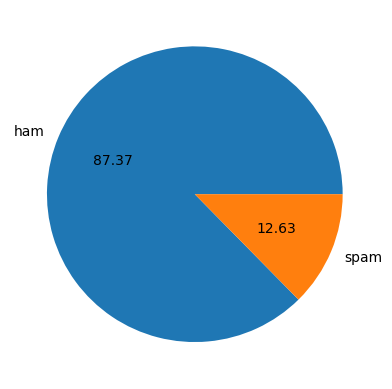

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
# Data is imbalanced


In [26]:
#natural language toolkit library to insert columns
import nltk


In [27]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# Fetching number of words

df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

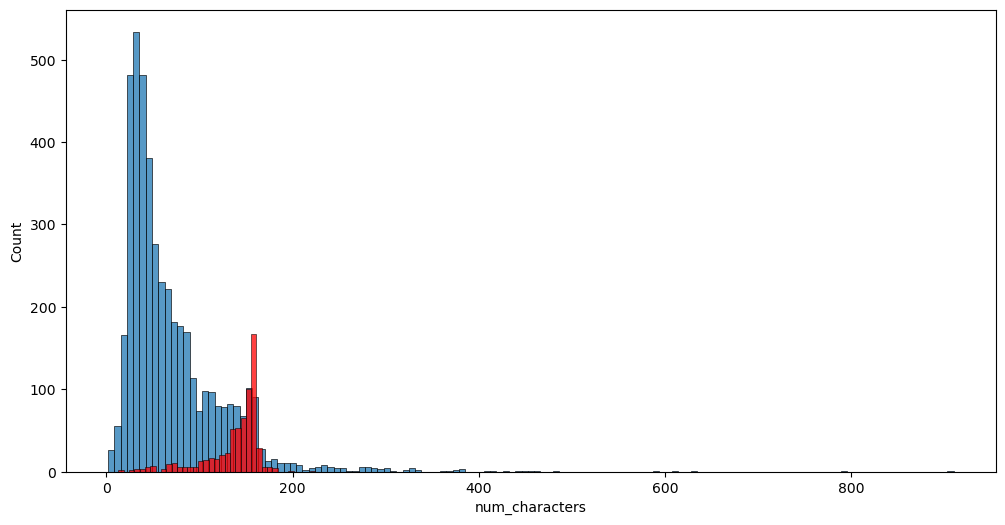

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0 ]['num_characters'])
sns.histplot(df[df['target'] == 1 ]['num_characters'],color='red')

c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

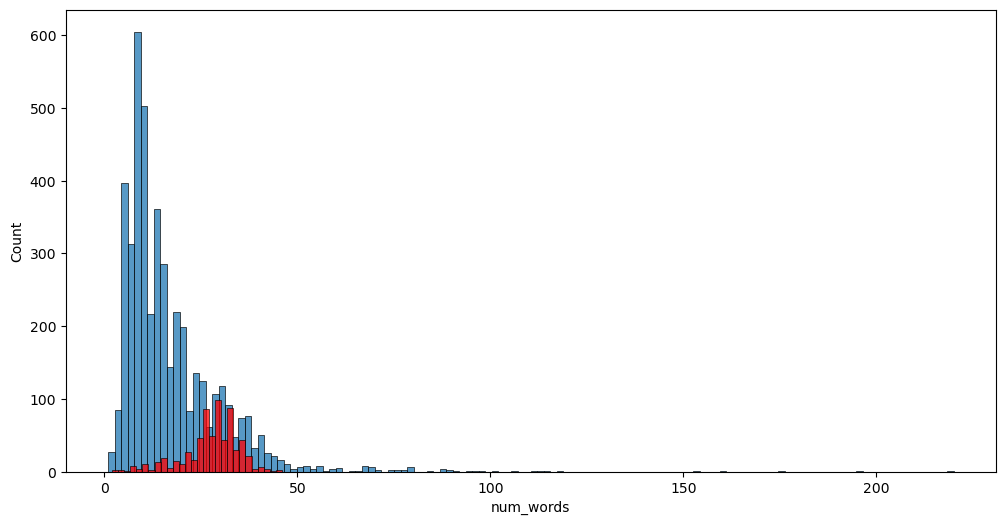

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0 ]['num_words'])
sns.histplot(df[df['target'] == 1 ]['num_words'],color='red')

c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\prach\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


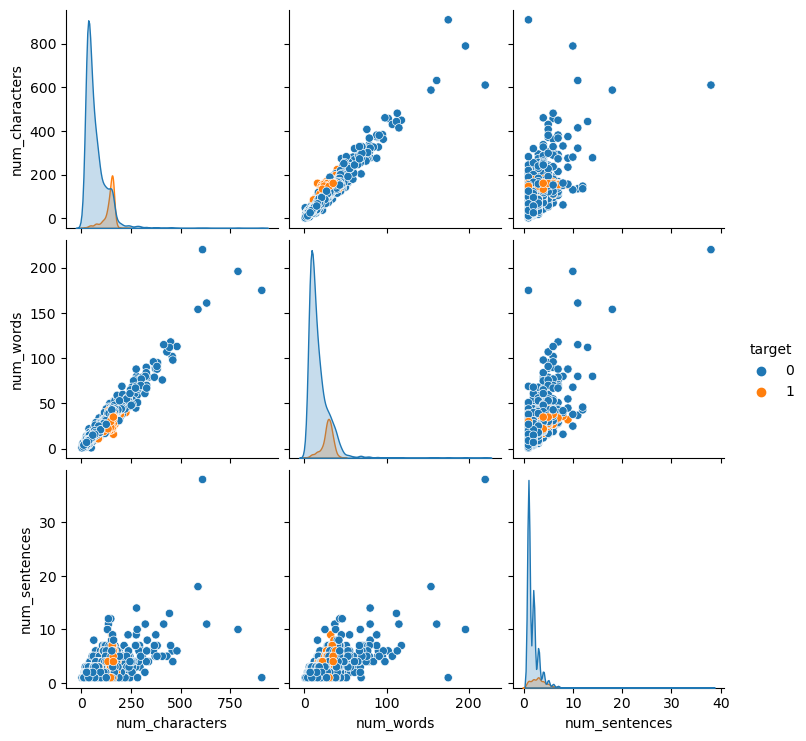

In [41]:
sns.pairplot(df,hue='target')

<Axes: >

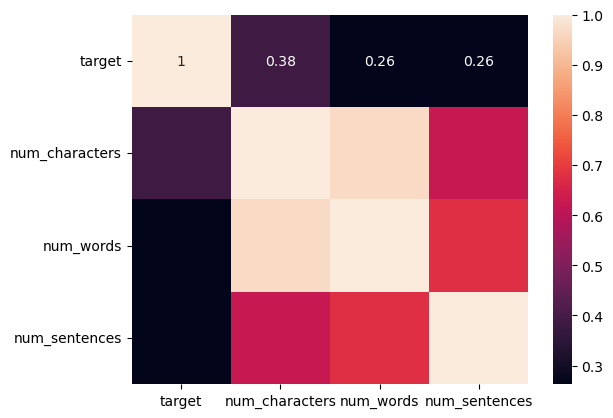

In [42]:
numeric_columns = df.select_dtypes(include=['number'])

#Plot heatmap of correlation matrix for numeric columns
sns.heatmap(numeric_columns.corr(), annot=True)

In [43]:
####Text/Data Preprocessing
#lower case
#tokenization(breaking into words)
#removing stop words and punctuation
#stemming(first second third form words into first only)



In [44]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
            text = y[:]
            y.clear()
            
            for i in text:
                if i not in stopwords.words('english') and i not in string.punctuation:
                   y.append(i)
                   
                   text = y[:]
                   y.clear()
                   
                   for i in text:
                       y.append(ps.stem(i))
                       
                       return " ".join(y) 


In [45]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [47]:
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK stopwords if not downloaded already
nltk.download('stopwords')

#Define your function to transform text
def transform_text(text):
    text = nltk.word_tokenize(text)
    y  = []
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    transformed_text = ' '.join(y)
    return transformed_text

#Apply the transform_text function to the 'text' column of your DataFrame
df['transformed_text'] = df['text'].apply(transform_text)
        
        

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,Go jurong point crazy .. Available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar ... Joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor ... U c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,Nah I n't think goes usf lives around though


In [49]:
%pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [50]:
from wordcloud import WordCloud


In [51]:
import matplotlib.pyplot as plt

In [52]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

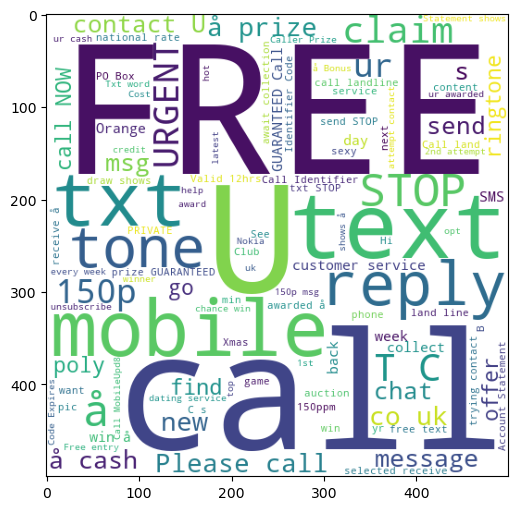

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

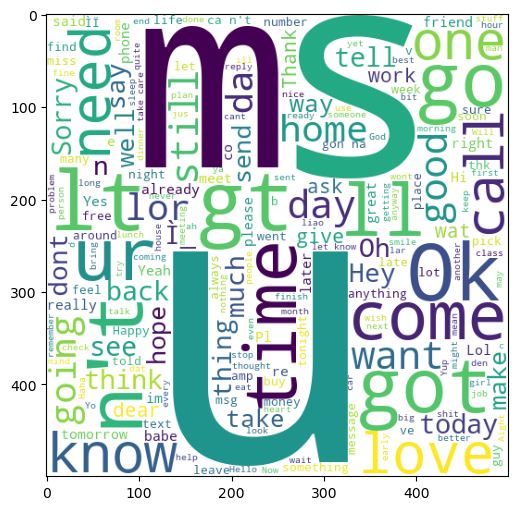

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,Go jurong point crazy .. Available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar ... Joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor ... U c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,Nah I n't think goes usf lives around though


In [57]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
len(spam_corpus)


11911

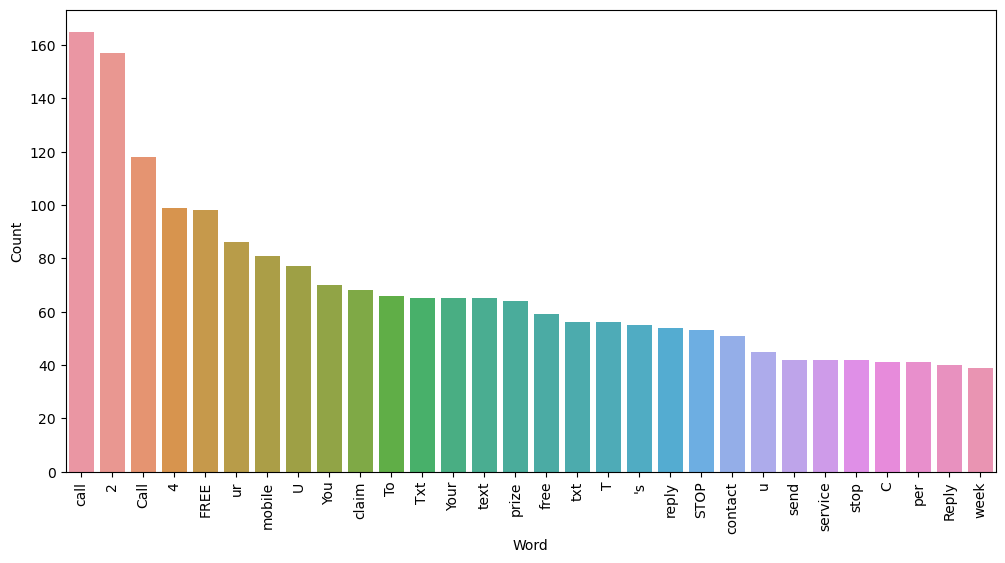

In [59]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is your list of words
# You may need to replace it with actual data you want to plot

# Create a DataFrame from Counter object
word_counts = Counter(spam_corpus)
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

#Plot using seaborn barplot
plt.figure(figsize=(12,6))
sns.barplot(data=word_counts_df, x='Word', y='Count')
plt.xticks(rotation='vertical')
plt.show()


In [60]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

45235

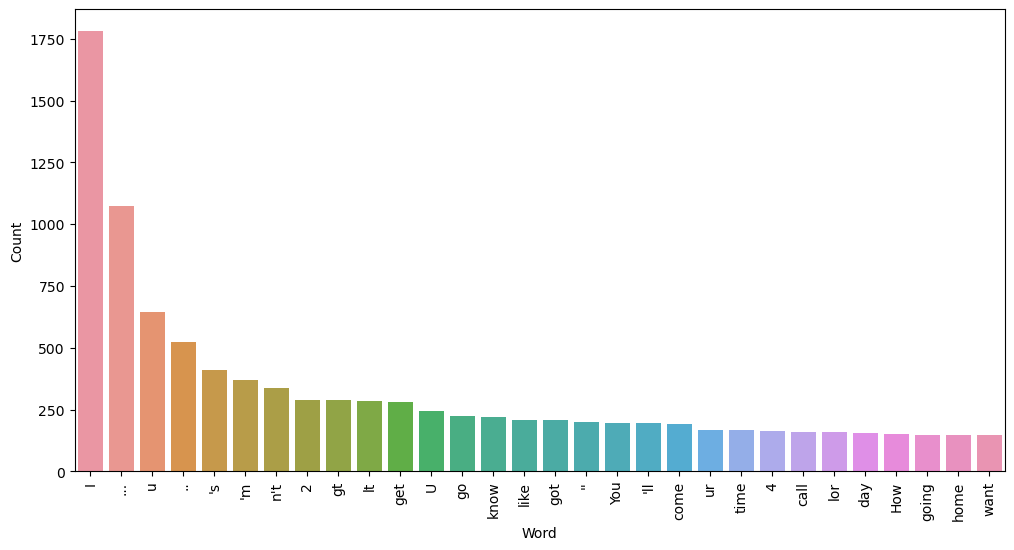

In [61]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ham_corpus' is your list of words
# You may need to replace it with actual data you want to plot

# Create a DataFrame from Counter object
word_counts = Counter(ham_corpus)
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word','Count'])

#Plot using seaborn barplot
plt.figure(figsize=(12,6))
sns.barplot(data=word_counts_df, x='Word' , y='Count')
plt.xticks(rotation='vertical')
plt.show()



In [62]:
#Text vectorization(words into numerical values)
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,Go jurong point crazy .. Available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,Ok lar ... Joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,U dun say early hor ... U c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,Nah I n't think goes usf lives around though


In [63]:
#### ***MODEL BUILDING*** 

In [64]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
x.shape

(5169, 3000)

In [67]:
y = df['target'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
#Initializing the Naive Bayes Classifier to check feature independence
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8926499032882012
[[802  94]
 [ 17 121]]
0.5627906976744186


In [73]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[896   0]
 [ 23 115]]
1.0


In [74]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854932301740812
[[895   1]
 [ 14 124]]
0.992


In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [79]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [80]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9816247582205029, 0.9917355371900827)

In [81]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

# Define your classifiers with valid parameters
clfs = {
    'SVC': SVC(),
    'KN': KNeighborsClassifier(),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'LR': LogisticRegression(penalty='l2', solver='liblinear'),  # Ensure correct penalty and solver
    'RF': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'BgC': BaggingClassifier(),
    'ETC': ExtraTreesClassifier(),
    'xgb': XGBClassifier(eval_metric='logloss')  # Ensure correct parameter for xgboost
}

def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Ensure correct average method
    return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9777562862669246
Precision - 0.9914529914529915
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.8926499032882012
Precision - 0.5627906976744186
For DT
Accuracy - 0.9593810444874274
Precision - 0.8529411764705882
For LR
Accuracy - 0.9671179883945842
Precision - 0.9905660377358491
For RF
Accuracy - 0.9738878143133463
Precision - 0.9911504424778761
For AdaBoost
Accuracy - 0.965183752417795
Precision - 0.9473684210526315
For BgC
Accuracy - 0.9613152804642167
Precision - 0.8951612903225806
For ETC
Accuracy - 0.9816247582205029
Precision - 0.983739837398374
For xgb
Accuracy - 0.9787234042553191
Precision - 0.9833333333333333


In [82]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [83]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
0,SVC,0.977756,0.991453
5,RF,0.973888,0.991150
4,LR,0.967118,0.990566
8,ETC,0.981625,0.983740
9,xgb,0.978723,0.983333
6,AdaBoost,0.965184,0.947368
7,BgC,0.961315,0.895161
3,DT,0.959381,0.852941
2,NB,0.892650,0.562791


In [84]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [85]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,SVC,Accuracy,0.977756
2,RF,Accuracy,0.973888
3,LR,Accuracy,0.967118
4,ETC,Accuracy,0.981625
5,xgb,Accuracy,0.978723
6,AdaBoost,Accuracy,0.965184
7,BgC,Accuracy,0.961315
8,DT,Accuracy,0.959381
9,NB,Accuracy,0.892650


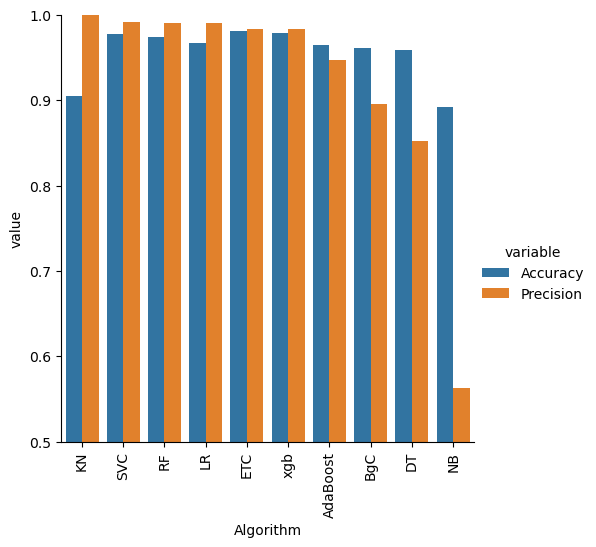

In [86]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,SVC,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453,0.977756,0.991453
2,RF,0.973888,0.991150,0.973888,0.991150,0.973888,0.991150,0.973888,0.991150
3,LR,0.967118,0.990566,0.967118,0.990566,0.967118,0.990566,0.967118,0.990566
4,ETC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
5,xgb,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
6,AdaBoost,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368,0.965184,0.947368
7,BgC,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161
8,DT,0.959381,0.852941,0.959381,0.852941,0.959381,0.852941,0.959381,0.852941
9,NB,0.892650,0.562791,0.892650,0.562791,0.892650,0.562791,0.892650,0.562791


In [88]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et',etc)],voting='soft')


In [90]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


In [92]:
# Applying stacking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [94]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874274661508704
Precision 0.9770992366412213


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pkl','wb'))